In [1]:
# Import semua library yang dibutuhkan.

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf
import urllib.request
import zipfile
import os
import matplotlib.pyplot as plt

In [2]:
def download_and_extract_data():
    # Download dan Extract dataset yang bakal dipakai
    train_url = 'https://github.com/dicodingacademy/assets/releases/download/release-horse-or-human/horse-or-human.zip'
    urllib.request.urlretrieve(train_url, 'horse-or-human.zip')
    with zipfile.ZipFile('horse-or-human.zip', 'r') as train_zip:
        train_zip.extractall('data/horse-or-human')

    # Download dan Extract dataset validation
    val_url = 'https://github.com/dicodingacademy/assets/raw/main/Simulation/machine_learning/validation-horse-or-human.zip'
    urllib.request.urlretrieve(val_url, 'validation-horse-or-human.zip')
    with zipfile.ZipFile('validation-horse-or-human.zip', 'r') as val_zip:
        val_zip.extractall('data/validation-horse-or-human')

# Jalankan functionnya
download_and_extract_data()
print("Datasets downloaded and extracted successfully!")

Datasets downloaded and extracted successfully!


In [3]:
# Iniialisasi path dari dataset
TRAINING_DIR = 'data/horse-or-human'
VALIDATION_DIR = 'data/validation-horse-or-human'

# Buat image data generator sehingga image bisa diubah menjadi data yang bisa diproses
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Buat image data generator tapi untuk validasi
validation_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Buat batch untuk ngetrain dari data image
train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

# Sekarang bikin untuk validasi
validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

# Debugger / confirmation
print("Data generators created successfully!")
print(f"Total training classes: {train_generator.num_classes}")
print(f"Example input shape: {train_generator.image_shape}")

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.
Data generators created successfully!
Total training classes: 2
Example input shape: (150, 150, 3)


In [4]:
# Bikin 4-layer CNN Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),  # Dropout for regularization
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary output layer
])

# Compile model dengan optimizer, loss, dan metrics seperti dibawah
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Perlihatkan hasil akhir model
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,309,729 (12.63 MB)

 Trainable params: 3,309,729 (12.63 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Latih Model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    verbose=1  # Display detailed output for each epoch
)

print("Training completed!")


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.4929 - loss: 0.6996 - val_accuracy: 0.5000 - val_loss: 0.7670
Epoch 2/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.6517 - loss: 0.6243 - val_accuracy: 0.5195 - val_loss: 0.9617
Epoch 3/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.7225 - loss: 0.5502 - val_accuracy: 0.5430 - val_loss: 1.3443
Epoch 4/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.7253 - loss: 0.5344 - val_accuracy: 0.5391 - val_loss: 1.2352
Epoch 5/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.7968 - loss: 0.4083 - val_accuracy: 0.5742 - val_loss: 1.3868
Epoch 6/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.8384 - loss: 0.3845 - val_accuracy: 0.5820 - val_loss: 2.2531
Epoch 7/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.8989 - loss: 0.2589 - val_accuracy: 0.6406 - val_loss: 2.2047
Epoch 8/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.9014 - loss: 0.2679 - val_accuracy: 0.6797 - val_loss:

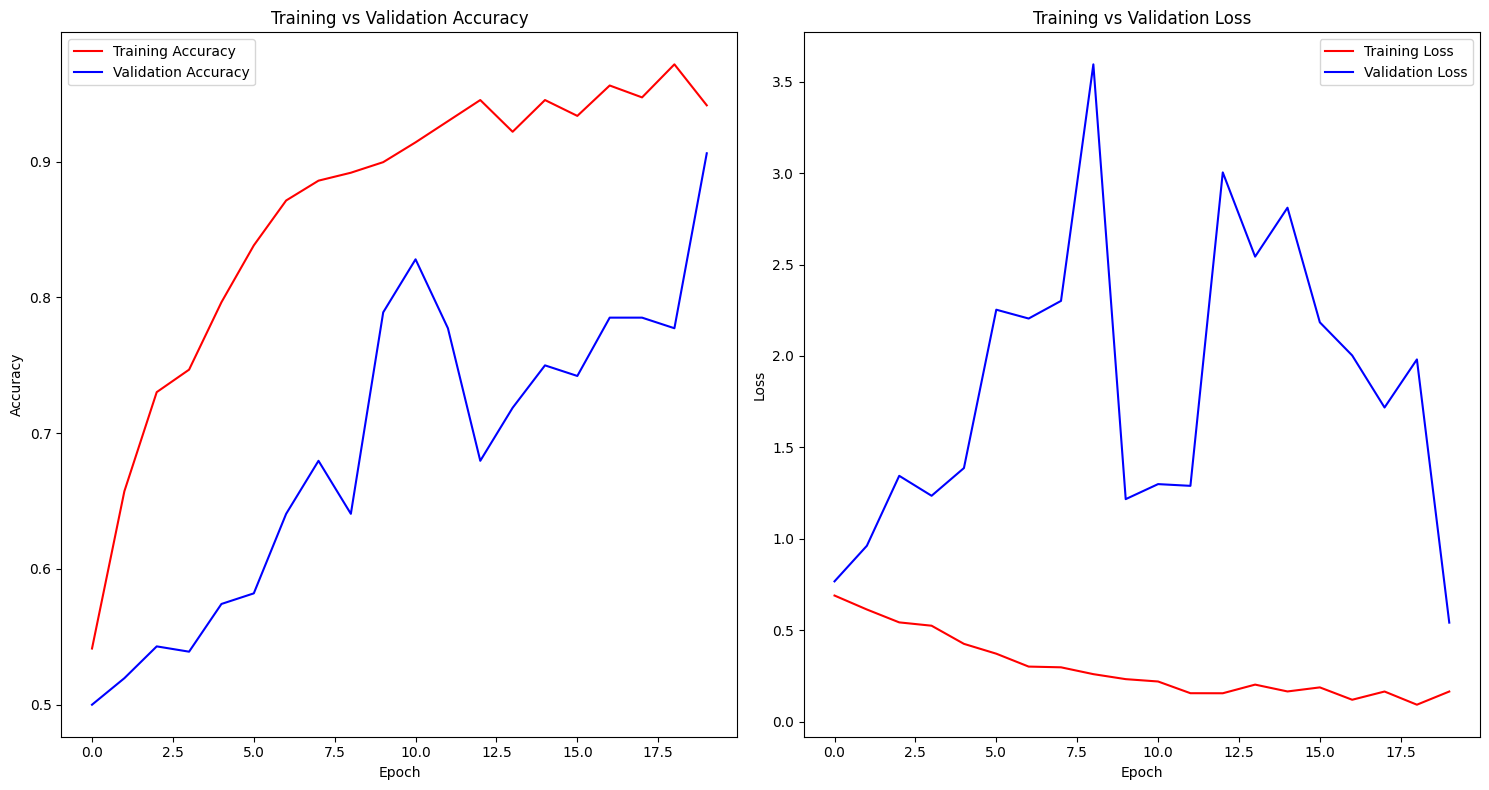

In [6]:
# Extract data dari hasil train
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Inisialisasi Epoch
epochs = range(len(acc))

# Set up figure untuk hasilnya
plt.figure(figsize=(15, 8))

# Buat accuracy curvesnya
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Buat Loss curvesnya
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Tampilkan Diagramnya
plt.tight_layout()
plt.show()

In [7]:
# Accuracy terakhir dari training
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]

# Keluarkan resultnya
print(f'\nFinal Training Accuracy: {final_train_acc * 100:.2f}%')
print(f'Final Validation Accuracy: {final_val_acc * 100:.2f}%')

# Evaluasi apakah model mencapai target!!!!!!!!
if final_val_acc > 0.83 and final_train_acc > 0.83:
    print("✅ Target reached: Validation accuracy > 83%!")
else:
    print("⚠️ Target not reached. Consider the following improvements:")
    print("- Increase the number of training epochs (e.g., 20–25)")
    print("- Add more Conv2D or Dense layers to the model")
    print("- Try adjusting the learning rate (e.g., lower to 0.0001)")



Final Training Accuracy: 94.16%
Final Validation Accuracy: 90.62%
✅ Target reached: Validation accuracy > 83%!


In [8]:
# Save model ke bentuk file!
model.save('horse_human_classifier.h5')
print("Model has been successfully saved as 'horse_human_classifier.h5'")

Model has been successfully saved as 'horse_human_classifier.h5'
